**Link dataset:** https://www.kaggle.com/datasets/omkargowda/suicide-rates-overview-1985-to-2021?select=master.csv

1. Country --> String | Cualitativo Nominal
2. Year --> Integer | Cualitativa Ordinal
3. sex --> String | Cualitativo Nominal
4. age --> String (aqui crearemos dos columnas para trabajare con los datos) | CuantitativoDiscreta
5. suicides_no --> Integer | Cuantitativo Discreta
6. population --> Integer | Cuantitativo Discreta
7. suicides/100k population
8. country-year --> String (mezcla de country y year) | Cualitativa Ordinal
country-year
9. HDI for year --> Float | Cuantitativo Continuo
10. gdp_for_year ($) --> Float | Cuantitativo Continuo


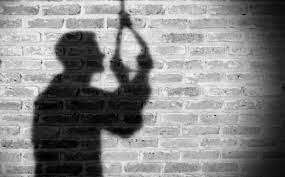

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import plotly as ply

Primero cargamos el dataset escogido para ser tratado de forma que primero realizaremos un EDA sobre los mismos y despues realizaremosun estudio con graficas.

In [ ]:
suicidios = pd.read_csv('/content/master.csv')
display(suicidios)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,Albania1987,NaN,"2,15,66,24,900",796.000000,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,Albania1987,NaN,"2,15,66,24,900",796.000000,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,Albania1987,NaN,"2,15,66,24,900",796.000000,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,Ukraine2017,0.785458,1.12E+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,United States of America2017,0.918620,1.95E+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from IPython.display import image
# image("/content/drive/MyDrive/Módulo 4 - Data Fundamentals con Python/Sesión 3/Práctica/Gaizka y Jaybeth/ImgSuic.jpg")

In [ ]:
suicidios.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [ ]:
suicidios.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

Aqui vemos que tipos de datos son los que inicialmente se 
han asignado para convertirlos posteriormente a los tipos que nos convengan para tratarlos.

In [ ]:
suicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


Convertimos los datos al tipo de dato interesante para nosotros con astype().

In [ ]:
suicidios['country'] = suicidios['country'].astype('string')
print(type(suicidios['country'][33]))

suicidios['sex'] = suicidios['sex'].astype('string')
print(type(suicidios['sex'][0]))

suicidios['age'] = suicidios['age'].astype('string')
print(type(suicidios['age'][0]))

suicidios['country-year'] = suicidios['country-year'].astype('string')
print(type(suicidios['country-year'][0]))

suicidios[' gdp_for_year ($) '] = suicidios[' gdp_for_year ($) '].astype('string')
print(type(suicidios[' gdp_for_year ($) '][0]))

suicidios['generation'] = suicidios['generation'].astype('string')
print(type(suicidios['generation'][0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


Verificamos que se han cambiado los tipos correctamente.

In [ ]:
suicidios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  string 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  string 
 3   age                 31756 non-null  string 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  string 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  string 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  string 
dtypes: float64(4), int64(2), string(6)
memory usage: 2.9 MB


Aquí vimos si nos interesaba modificar la columna de age para tratarla en consecuencia. Como solo había 6 tipos decidimos dejarla tal cual.

In [ ]:
suicidios['age'].nunique()

6

## VARIABLE suicides_no


In [ ]:
#suicidios.drop(columns=['country-year'])

In [ ]:
suicidios = suicidios.dropna(subset = ['suicides_no'])
#suicidios['suicides_no'] = suicidios['suicides_no'].drop(columns = 0)
suicidios[suicidios['suicides_no'].isnull()]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation


In [ ]:
#suicidios['suicides_no'] = suicidios['suicides_no'].drop(suicidios['suicides_no']==0)
#suicidios.drop(['suicides_no']==0, axis = 0,inplace = True)
suicidios.drop(suicidios[suicidios['suicides_no']==0].index,inplace=True)
suicidios[suicidios['suicides_no']==0]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation


In [ ]:
suicidios.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers
5,Albania,1987,female,75+ years,1.0,35600,2.81,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
6,Albania,1987,female,35-54 years,6.0,278800,2.15,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
7,Albania,1987,female,25-34 years,4.0,257200,1.56,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers
8,Albania,1987,male,55-74 years,1.0,137500,0.73,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
12,Albania,1988,female,75+ years,2.0,36400,5.49,Albania1988,NaN,"2,12,60,00,000",769.0,G.I. Generation


Aqui nos dimos cuenta que borrar aquellas filas que contuviesen un null/0 para que nos quedase mejor el estudio era una bellaquería. Por lo que mejor haremos un filtrado.

In [ ]:
suicidiosAux = suicidios[(suicidios['suicides_no']!=0)]
suicidiosAux = suicidiosAux[(suicidiosAux['suicides_no'].notnull())]

In [ ]:
suicidiosAux['suicides_no'].isnull().sum()

0

Una vez hecho el filtro procederemos a calcular los cuartiles de esta variable y despues hacer un diagrama y ver que distribución siguen los datos

In [ ]:
serieQuantity = suicidiosAux['suicides_no'].describe()
print(serieQuantity)

count    30556.000000
mean       237.136242
std        867.956107
min          0.000000
25%          3.000000
50%         25.000000
75%        132.000000
max      22338.000000
Name: suicides_no, dtype: float64


In [ ]:
# suicidios[suicidios['suicides_no'].isnull()]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27820,Antigua and Barbuda,2020,male,5-14 years,NaN,92664,0.0,Antigua and Barbuda2020,0.920514,1370281481,13992.744480,Generation X
27821,Argentina,2020,male,5-14 years,NaN,45376763,0.0,Argentina2020,0.832784,3.89E+11,8579.017773,Generation X
27822,Armenia,2020,male,5-14 years,NaN,2805608,0.0,Armenia2020,0.756001,12641209802,4266.018074,Generation X
27825,Belarus,2020,male,5-14 years,NaN,9379952,0.0,Belarus2020,0.801273,60258239056,6424.152176,Generation X
27826,Belgium,2020,male,5-14 years,NaN,11538604,0.0,Belgium2020,0.938754,5.22E+11,45159.348220,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
31668,Turkey,2018,female,75+ years,NaN,82809304,0.0,Turkey2018,0.805014,7.78E+11,9454.348443,G.I. Generation
31679,Belarus,2017,female,75+ years,NaN,9458989,0.0,Belarus2017,0.819359,54726595249,5785.670673,G.I. Generation
31707,Ireland,2017,female,75+ years,NaN,4807388,0.0,Ireland2017,0.921599,3.35E+11,69601.683880,G.I. Generation
31716,Lebanon,2017,female,75+ years,NaN,6109252,0.0,Lebanon2017,0.696811,53324800959,7819.604670,G.I. Generation


In [ ]:
iqr = serieQuantity['75%'] - serieQuantity["25%"]
print(iqr)

129.0


In [ ]:
maximo = serieQuantity["75%"]+1.5*iqr # Q3+ 1.5IQR
print(maximo)
minimo = serieQuantity["25%"]-1.5*iqr
print(minimo) # bigote inferior

325.5
-190.5


Aplicamos un filtro superior e inferior para remarcar aquellos valores que se salen de lo comun (outliers) 

In [ ]:
filtroInferior = suicidiosAux['suicides_no'] < minimo # valores que están por encima del bigote superior
suicidiosAux[filtroInferior]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation


In [ ]:
filtroSuperior = suicidiosAux['suicides_no'] > maximo # valores que están por encima del bigote superior
suicidiosAux[filtroSuperior]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
589,Argentina,1985,male,55-74 years,485.0,1997000,24.290000,Argentina1985,0.694000,"88,41,66,68,900",3264.00000,G.I. Generation
590,Argentina,1985,male,35-54 years,414.0,3346300,12.370000,Argentina1985,0.694000,"88,41,66,68,900",3264.00000,Silent
601,Argentina,1986,male,55-74 years,530.0,2008300,26.390000,Argentina1986,NaN,"1,10,93,44,42,763",4072.00000,G.I. Generation
602,Argentina,1986,male,35-54 years,478.0,3365200,14.200000,Argentina1986,NaN,"1,10,93,44,42,763",4072.00000,Silent
613,Argentina,1987,male,55-74 years,532.0,2034500,26.150000,Argentina1987,NaN,"1,11,10,61,91,358",4026.00000,G.I. Generation
...,...,...,...,...,...,...,...,...,...,...,...,...
31701,Germany,2017,female,75+ years,572.0,82657002,0.692016,Germany2017,0.928812,3.68E+12,44542.29520,G.I. Generation
31710,Japan,2017,female,75+ years,1495.0,126972000,1.177425,Japan2017,0.905657,4.93E+12,38891.08627,G.I. Generation
31734,Republic of Korea,2017,female,75+ years,645.0,290239,222.230644,Republic of Korea2017,0.918620,4.76E+13,43033.44080,G.I. Generation
31737,Russian Federation,2017,female,75+ years,798.0,144496739,0.552262,Russian Federation2017,0.832394,1.57E+12,10720.33266,G.I. Generation


In [ ]:
#suicidios['suicides_no'].describe()

count    25980.000000
mean       278.904349
std        935.090605
min          1.000000
25%          8.000000
50%         42.500000
75%        175.000000
max      22338.000000
Name: suicides_no, dtype: float64

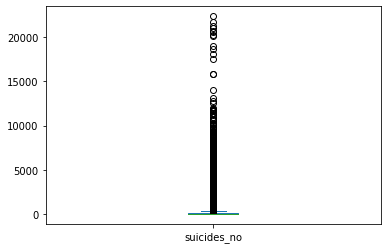

<Figure size 72000x28800 with 0 Axes>

In [ ]:
#plt.boxplot(suicidios['suicides_no'])
#plt.show()

suicidiosAux['suicides_no'].plot(kind='box')
plt.figure(figsize=(1000,400))
plt.show()

In [ ]:
suicidiosAux = suicidiosAux.sort_values(by='year')

import plotly.express as px

fig = px.scatter_geo(suicidiosAux, locations="country", locationmode = 'country names',
                     color = 'sex', hover_name="country", size="suicides_no",
                     projection="mercator", animation_frame = 'year')
fig.show()

In [ ]:
suicidiosAux

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,Albania1987,NaN,"2,15,66,24,900",796.000000,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,Albania1987,NaN,"2,15,66,24,900",796.000000,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,Albania1987,NaN,"2,15,66,24,900",796.000000,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,Ukraine2017,0.785458,1.12E+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,United States of America2017,0.918620,1.95E+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation


In [ ]:
import plotly.express as px 

fig = px.scatter_3d(suicidiosAux, x = 'suicides_no', y = 'sex',z = 'age')
fig.show() 

In [ ]:
#suicidiosAux['suicides_no'].plot.bar()

<AxesSubplot:>

Error in callback <function flush_figures at 0x7f7bddd0b160> (for post_execute):


KeyboardInterrupt: ignored

## Variable ' gdp_for_year ($) '

In [ ]:
print(type(suicidios[' gdp_for_year ($) ']))
display(suicidios[' gdp_for_year ($) '])


suicidios[' gdp_for_year ($) '] = suicidios[' gdp_for_year ($) '].astype('string')
print(type(suicidios[' gdp_for_year ($) '][0]))
suicidios[' gdp_for_year ($) '] = suicidios[' gdp_for_year ($) '].str.replace(",","")


<class 'pandas.core.series.Series'>


0        2,15,66,24,900
1        2,15,66,24,900
2        2,15,66,24,900
3        2,15,66,24,900
4        2,15,66,24,900
              ...      
31751          1.12E+11
31752          2.70E+12
31753          1.95E+13
31754       64233966861
31755       62081323299
Name:  gdp_for_year ($) , Length: 27180, dtype: string

<class 'str'>


In [ ]:
suicidios[' gdp_for_year ($) '] = suicidios[' gdp_for_year ($) '].astype('float64')

In [ ]:
suicidios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27180 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27180 non-null  string 
 1   year                27180 non-null  int64  
 2   sex                 27180 non-null  string 
 3   age                 27180 non-null  string 
 4   suicides_no         25980 non-null  float64
 5   population          27180 non-null  int64  
 6   suicides/100k pop   27180 non-null  float64
 7   country-year        27180 non-null  string 
 8   HDI for year        10848 non-null  float64
 9    gdp_for_year ($)   27180 non-null  float64
 10  gdp_per_capita ($)  27180 non-null  float64
 11  generation          27180 non-null  string 
dtypes: float64(5), int64(2), string(5)
memory usage: 3.7 MB


In [ ]:
text = suicidios[' gdp_for_year ($) '][31751]
# suicidios[' gdp_for_year ($) '].str.replace(text,"00000000000")
print(text)
float(text)

1.12E+11


112000000000.0

In [ ]:
import plotly.express as px 

px.box(suicidios, y = " gdp_for_year ($) ")

## Variable 'gdp_per_capita ($)'

In [ ]:
print("NumGdpCapita" , suicidios['gdp_per_capita ($)'].count())

NumGdpCapita 31756


In [ ]:
# suicidios.plot.scatter(x = 'gdp_per_capita ($)',y = 'age' )
# plt.figure(figsize=(1000,400))
# plt.show()

sucidiosAux2 = suicidios.groupby(by="age")
display(sucidiosAux2)


No se pa que coño se usa esto

In [ ]:

fig = scatter 

In [ ]:
# intervalos = range(min(suicidios['age']), max(edades) + 2) #calculamos los extremos de los intervalos

# plot.hist(x=edades, bins=intervalos, color='#F2AB6D', rwidth=0.85)
# plot.title('Histograma de edades - matplotlib - codigopiton.com')
# plot.xlabel('Edades')
# plot.ylabel('Frecuencia')
# plot.xticks(intervalos)

# plot.show() #dibujamos el histograma

In [ ]:
print("HDI distintos" , suicidios['HDI for year'].count())
HDIaux = suicidios[(suicidios['HDI for year']!=0)]
HDIaux = suicidiosAux[(suicidiosAux['HDI for year'].notnull())]
HDIaux['HDI for year'].isnull().sum()

HDI distintos 12300


0

In [ ]:
# import pandas as pd
# fruit_list = [ ('Orange', 34, 'Yes' ) ,
#              ('Mango', 24, 'No' ) ,
#              ('banana', 14, 'No' ) ,
#              ('Apple', 44, 'Yes' ) ,
#              ('Pineapple', 64, 'No') ,
#              ('Kiwi', 84, 'Yes')  ]

# df = pd.DataFrame(fruit_list, columns = ['Name' , 'Price', 'In_Stock']) 
# grouped_df = df.groupby('In_Stock')
# print(grouped_df)
# print(type(grouped_df))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


## CONCLUSIONES


Sacamos la conclusion que esta columna podría haber sido borrada country-year ya que las tenemos separadas country y year entonces esta nos sobra.

In [ ]:
print("NumPaises" , suicidios['country'].count())
print("NumAños" , suicidios['year'].count())
print("NumCountryYear" , suicidios['country-year'].count())

NumPaises 31756
NumAños 31756
NumCountryYear 31756


Con este count y un vistazo a ojo vemos que no hay filas con valor NaN o Null viendo que estas tres columnas estan relacionadas y por tanto nos ayudará eliminar la de 'country-year'

In [ ]:
suicidios['year'] = suicidios['year'].astype('string')
print((suicidios['country-year'] == suicidios['country'] + suicidios['year']).sum())
suicidios['year'] = suicidios['year'].astype('int64')

31756
